## Predicting Naval Vessel Condition for the Purpose of Preventative Maintenance
### DSC 680 Project 3
### Shu Liu

In [1]:
# Import all the necessary libraries/packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Import warnings and set filter warnings to ignore due to the use of deprecated code
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Source: https://www.kaggle.com/datasets/thedevastator/improving-naval-vessel-condition-through-machine/data

In [3]:
# Read the CSV files into pandas DataFrames and assign them to variables
df = pd.read_csv('C:\\Users\\Owner\\NavalVessel.csv')

# Display the first few rows of the DataFrame
df.head()

,lever_position,ship_speed,gas_turbine_shaft_torque,gas_turbine_revolutions,gas_generator_revolutions,starboard_propeller_torque,port_propeller_torque,high_pressure_turbine_exit_temperature,gas_turbine_inlet_temperature,gas_turbine_outlet_temperature,high_pressure_ turbine_exit_pressure,gas_turbine_inlet_pressure,gas_turbine_outlet_pressure,gas_turbine_exhaust_pressure,turbine_injecton_control,fuel_flow,gas_turbine_compressor_decay_state_coefficient,gas_turbine_decay_state_coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [4]:
# Retrieve the shape of the DataFrame
df.shape

(11934, 18)

In [5]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   lever_position                                  11934 non-null  float64
 1   ship_speed                                      11934 non-null  int64  
 2   gas_turbine_shaft_torque                        11934 non-null  float64
 3   gas_turbine_revolutions                         11934 non-null  float64
 4   gas_generator_revolutions                       11934 non-null  float64
 5   starboard_propeller_torque                      11934 non-null  float64
 6   port_propeller_torque                           11934 non-null  float64
 7   high_pressure_turbine_exit_temperature          11934 non-null  float64
 8   gas_turbine_inlet_temperature                   11934 non-null  int64  
 9   gas_turbine_outlet_temperature         

In [6]:
# Calculate the sum of missing values in each column of the DataFrame
df.isnull().sum()

lever_position                                    0
ship_speed                                        0
gas_turbine_shaft_torque                          0
gas_turbine_revolutions                           0
gas_generator_revolutions                         0
starboard_propeller_torque                        0
port_propeller_torque                             0
high_pressure_turbine_exit_temperature            0
gas_turbine_inlet_temperature                     0
gas_turbine_outlet_temperature                    0
high_pressure_ turbine_exit_pressure              0
gas_turbine_inlet_pressure                        0
gas_turbine_outlet_pressure                       0
gas_turbine_exhaust_pressure                      0
turbine_injecton_control                          0
fuel_flow                                         0
gas_turbine_compressor_decay_state_coefficient    0
gas_turbine_decay_state_coefficient               0
dtype: int64

In [7]:
# Generate descriptive statistics for numerical columns in the DataFrame
df.describe()

,lever_position,ship_speed,gas_turbine_shaft_torque,gas_turbine_revolutions,gas_generator_revolutions,starboard_propeller_torque,port_propeller_torque,high_pressure_turbine_exit_temperature,gas_turbine_inlet_temperature,gas_turbine_outlet_temperature,high_pressure_ turbine_exit_pressure,gas_turbine_inlet_pressure,gas_turbine_outlet_pressure,gas_turbine_exhaust_pressure,turbine_injecton_control,fuel_flow,gas_turbine_compressor_decay_state_coefficient,gas_turbine_decay_state_coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [8]:
# Rename the column 'gas_turbine_compressor_decay_state_coefficient' to 'compressor'
df.rename({'gas_turbine_compressor_decay_state_coefficient':'compressor'},axis=1,inplace=True)

# Rename the column 'gas_turbine_decay_state_coefficient' to 'gas_coefficient'
df.rename({'gas_turbine_decay_state_coefficient':'gas_coefficient'},axis=1,inplace=True)

# Data Analysis

In [9]:
# Retrieve the column names of the DataFrame
df.columns

Index(['lever_position', 'ship_speed', 'gas_turbine_shaft_torque',
       'gas_turbine_revolutions', 'gas_generator_revolutions',
       'starboard_propeller_torque', 'port_propeller_torque',
       'high_pressure_turbine_exit_temperature',
       'gas_turbine_inlet_temperature', 'gas_turbine_outlet_temperature',
       'high_pressure_ turbine_exit_pressure', 'gas_turbine_inlet_pressure',
       'gas_turbine_outlet_pressure', 'gas_turbine_exhaust_pressure',
       'turbine_injecton_control', 'fuel_flow', 'compressor',
       'gas_coefficient'],
      dtype='object')

In [10]:
# Count the occurrences of each unique value in the 'compressor' column
df['compressor'].value_counts()

0.950    234
0.988    234
0.978    234
0.979    234
0.980    234
0.981    234
0.982    234
0.983    234
0.984    234
0.985    234
0.986    234
0.987    234
0.989    234
0.976    234
0.990    234
0.991    234
0.992    234
0.993    234
0.994    234
0.995    234
0.996    234
0.997    234
0.998    234
0.999    234
0.977    234
0.975    234
0.951    234
0.962    234
0.952    234
0.953    234
0.954    234
0.955    234
0.956    234
0.957    234
0.958    234
0.959    234
0.960    234
0.961    234
0.963    234
0.974    234
0.964    234
0.965    234
0.966    234
0.967    234
0.968    234
0.969    234
0.970    234
0.971    234
0.972    234
0.973    234
1.000    234
Name: compressor, dtype: int64

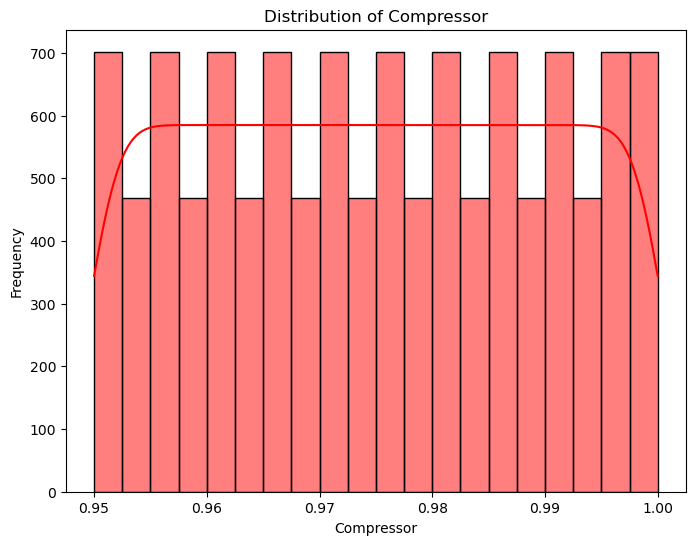

In [11]:
# Distribution of gas_turbine_compressor_decay_state_coefficient (compressor)

# Create a new figure with a specific size
plt.figure(figsize=(8, 6))

# Plot a histogram of the 'compressor' column with 20 bins and a kernel density estimate
sns.histplot(df['compressor'], bins=20, kde=True, color='red')

# Add a title to the plot
plt.title('Distribution of Compressor')

# Add label to the x-axis
plt.xlabel('Compressor')

# Add label to the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [12]:
# lever_position

In [13]:
# Count the occurrences of each unique value in the 'lever_position' column
df['lever_position'].value_counts()

1.138    1326
2.088    1326
3.144    1326
4.161    1326
5.140    1326
6.175    1326
7.148    1326
8.206    1326
9.300    1326
Name: lever_position, dtype: int64

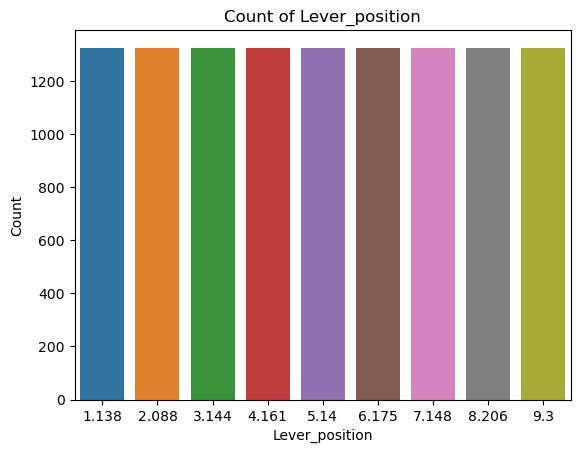

In [14]:
# Create a count plot of the 'lever_position' column
sns.countplot(x='lever_position', data=df)

# Add a title to the plot
plt.title('Count of Lever_position')

# Add label to the x-axis
plt.xlabel('Lever_position')

# Add label to the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()

In [15]:
# gas_coefficient

In [16]:
# Count the occurrences of each unique value in the 'gas_coefficient' column
df['gas_coefficient'].value_counts()

0.975    459
0.976    459
0.999    459
0.998    459
0.997    459
0.996    459
0.995    459
0.994    459
0.993    459
0.992    459
0.991    459
0.990    459
0.989    459
0.988    459
0.987    459
0.986    459
0.985    459
0.984    459
0.983    459
0.982    459
0.981    459
0.980    459
0.979    459
0.978    459
0.977    459
1.000    459
Name: gas_coefficient, dtype: int64

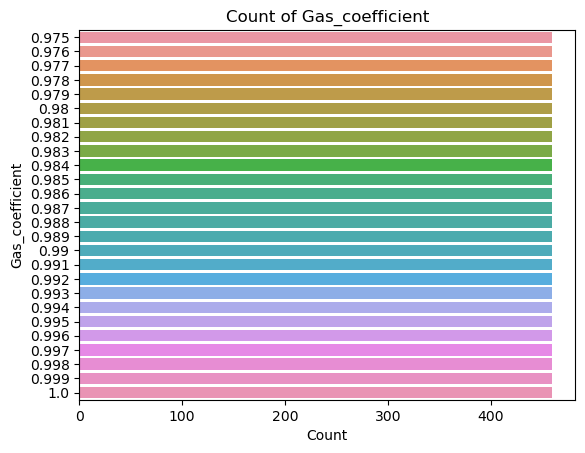

In [17]:
# Create a count plot of the 'gas_coefficient' column
sns.countplot(y=df['gas_coefficient'])

# Add a title to the plot
plt.title('Count of Gas_coefficient')

# Add label to the x-axis
plt.xlabel('Count')

# Add label to the y-axis
plt.ylabel('Gas_coefficient')

# Display the plot
plt.show()

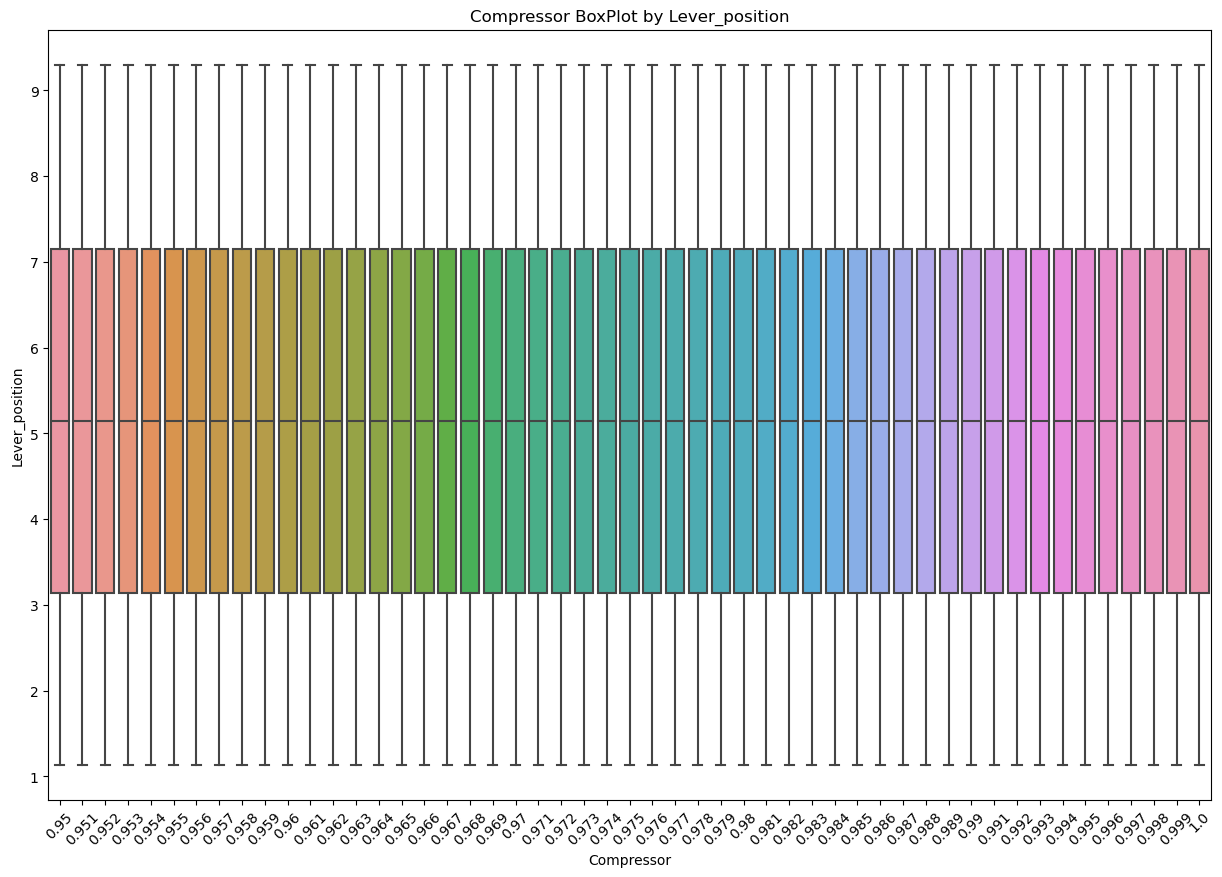

In [18]:
# Create a boxplot to visualize the distribution of 'compressor' values across different 'lever_position' categories

# Create a new figure with a specific size
plt.figure(figsize=(15, 10))

# Create a boxplot with 'lever_position' on the y-axis and 'compressor' on the x-axis
sns.boxplot(y='lever_position', x='compressor', data=df)

# Add a title to the plot
plt.title('Compressor BoxPlot by Lever_position')

# Add label to the x-axis
plt.xlabel('Compressor')

# Add label to the y-axis
plt.ylabel('Lever_position')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [19]:
# Display the head of the DataFrame 
df.head()

,lever_position,ship_speed,gas_turbine_shaft_torque,gas_turbine_revolutions,gas_generator_revolutions,starboard_propeller_torque,port_propeller_torque,high_pressure_turbine_exit_temperature,gas_turbine_inlet_temperature,gas_turbine_outlet_temperature,high_pressure_ turbine_exit_pressure,gas_turbine_inlet_pressure,gas_turbine_outlet_pressure,gas_turbine_exhaust_pressure,turbine_injecton_control,fuel_flow,compressor,gas_coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [20]:
# # Display the column names of the DataFrame
df.columns

Index(['lever_position', 'ship_speed', 'gas_turbine_shaft_torque',
       'gas_turbine_revolutions', 'gas_generator_revolutions',
       'starboard_propeller_torque', 'port_propeller_torque',
       'high_pressure_turbine_exit_temperature',
       'gas_turbine_inlet_temperature', 'gas_turbine_outlet_temperature',
       'high_pressure_ turbine_exit_pressure', 'gas_turbine_inlet_pressure',
       'gas_turbine_outlet_pressure', 'gas_turbine_exhaust_pressure',
       'turbine_injecton_control', 'fuel_flow', 'compressor',
       'gas_coefficient'],
      dtype='object')

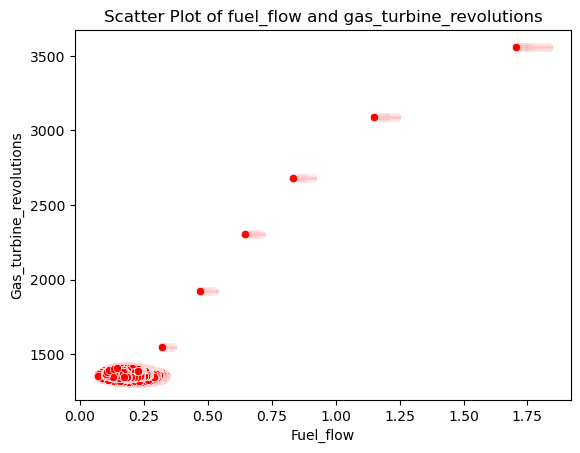

In [21]:
# Create a scatter plot with 'fuel_flow' on the x-axis and 'gas_turbine_revolutions' on the y-axis
sns.scatterplot(x='fuel_flow', y='gas_turbine_revolutions', data=df, color='red')

# Add a title to the plot
plt.title('Scatter Plot of fuel_flow and gas_turbine_revolutions')

# Add label to the x-axis
plt.xlabel('Fuel_flow')

# Add label to the y-axis
plt.ylabel('Gas_turbine_revolutions')

# Display the plot
plt.show()

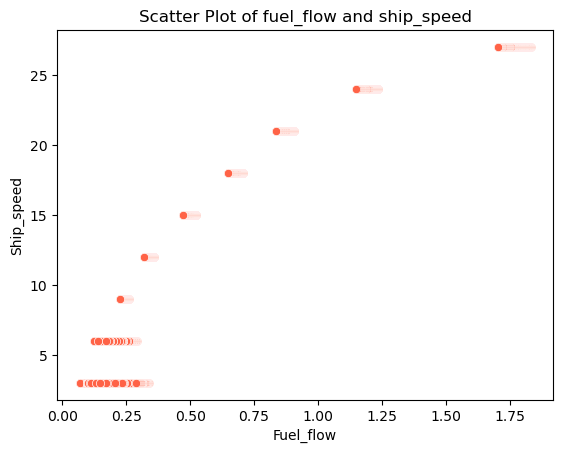

In [22]:
# Create a scatter plot with 'fuel_flow' on the x-axis and 'ship_speed' on the y-axis
sns.scatterplot(x='fuel_flow', y='ship_speed', data=df, color='tomato')

# Add a title to the plot
plt.title('Scatter Plot of fuel_flow and ship_speed')

# Add label to the x-axis
plt.xlabel('Fuel_flow')

# Add label to the y-axis
plt.ylabel('Ship_speed')

# Display the plot
plt.show()

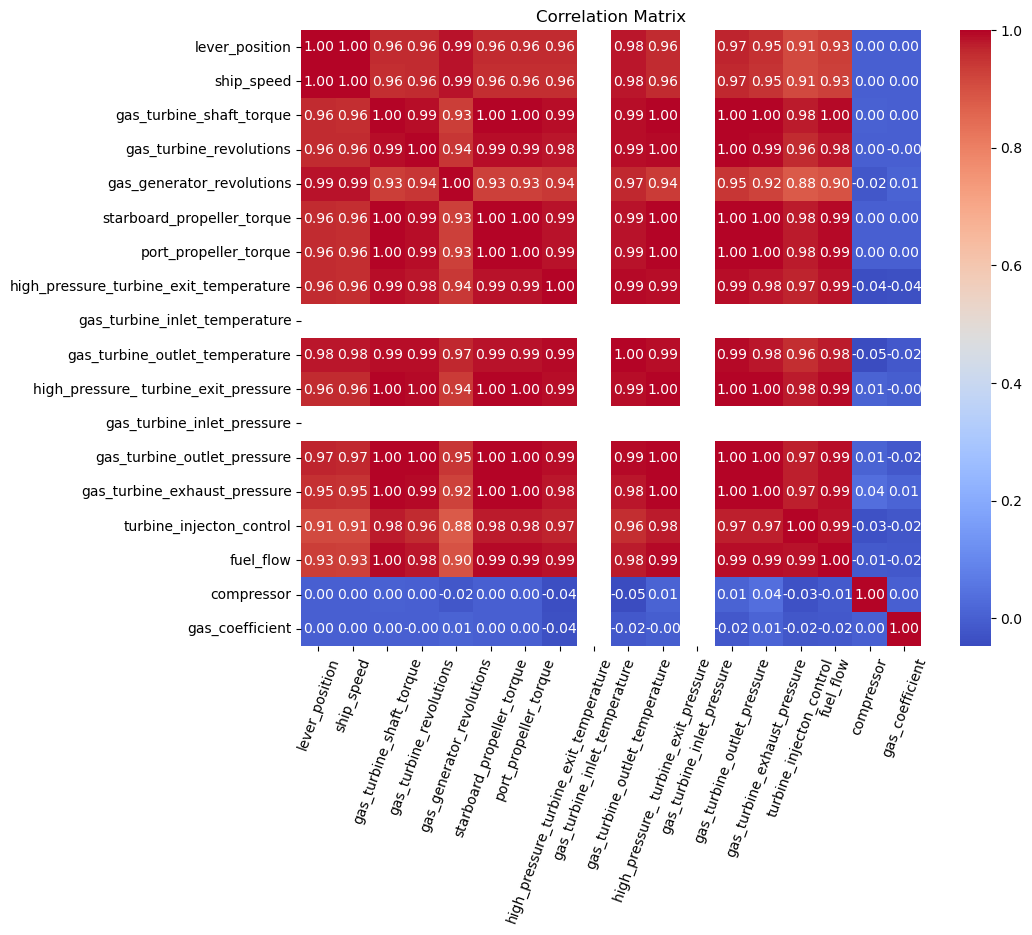

In [23]:
# Correlation Matrix

# Create a new figure with a specific size
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the plot
plt.title('Correlation Matrix')

# Rotate x-axis labels for better readability
plt.xticks(rotation=70)

# Display the plot
plt.show()

In [24]:
# Create binary target variable
df['maintenance_needed'] = (df['compressor'] > 0.975).astype(int)

In [25]:
# Display the head of the DataFrame 
df.head()

,lever_position,ship_speed,gas_turbine_shaft_torque,gas_turbine_revolutions,gas_generator_revolutions,starboard_propeller_torque,port_propeller_torque,high_pressure_turbine_exit_temperature,gas_turbine_inlet_temperature,gas_turbine_outlet_temperature,high_pressure_ turbine_exit_pressure,gas_turbine_inlet_pressure,gas_turbine_outlet_pressure,gas_turbine_exhaust_pressure,turbine_injecton_control,fuel_flow,compressor,gas_coefficient,maintenance_needed
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975,0
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975,0
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975,0
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975,0
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975,0


In [26]:
# Count the occurrences of each unique value in the 'maintenance_needed' column
df['maintenance_needed'].value_counts()

0    6084
1    5850
Name: maintenance_needed, dtype: int64

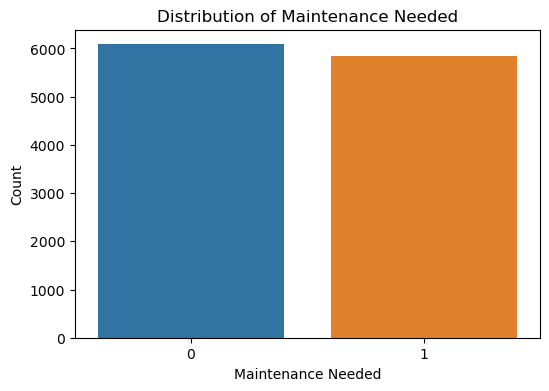

In [27]:
# Calculate the value counts of 'maintenance_needed' column
value_counts = df['maintenance_needed'].value_counts()

# Create a new figure with a specific size
plt.figure(figsize=(6, 4))

# Create a bar plot of the value counts
sns.barplot(x=value_counts.index, y=value_counts.values)

# Add a title to the plot
plt.title('Distribution of Maintenance Needed')

# Add label to the x-axis
plt.xlabel('Maintenance Needed')

# Add label to the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()

In [28]:
# Separate features (X) and target variable (y)
X = df.drop(["compressor", "maintenance_needed"], axis=1)
y = df["maintenance_needed"]

In [29]:
# Split the features (X) and target variable (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize the model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Make predictions on the test set
y_pred_log = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)

Accuracy: 0.789694176790951


In [32]:
# Initialize the model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9853372434017595


In [34]:
# The Random Forest model is preferred.

In [35]:
# Next is doing Feature importances to improve the power of the prediction model

In [36]:
# Initialize the Random Forest classifier with 100 trees and a random state of 42
rf = RandomForestClassifier(n_estimators=100,random_state=42)

# Fit the Random Forest classifier to the data
rf1 = rf.fit(X,y)

# Create a DataFrame to store feature importances
pd.DataFrame({
    'feature':X.columns,
    'RF_importance':rf1.feature_importances_ # Sort the DataFrame by RF_importance in descending order
    
}).sort_values(by='RF_importance',ascending=False)

,feature,RF_importance
9,gas_turbine_outlet_temperature,0.165915
4,gas_generator_revolutions,0.128630
2,gas_turbine_shaft_torque,0.121073
10,high_pressure_ turbine_exit_pressure,0.109995
13,gas_turbine_exhaust_pressure,0.102507
5,starboard_propeller_torque,0.056287
7,high_pressure_turbine_exit_temperature,0.055451
3,gas_turbine_revolutions,0.053166
6,port_propeller_torque,0.049133
12,gas_turbine_outlet_pressure,0.044506


In [37]:
# I decided to drop further features that are less than 0.05. In effort to enhance the power of preditive model. In
# this case is the random forest model.

# Drop features that are below .05
['port_propeller_torque','gas_turbine_outlet_pressure','turbine_injecton_control','gas_turbine_outlet_pressure',
'fuel_flow','gas_coefficient','lever_position','ship_speed',
'gas_turbine_inlet_pressure','gas_turbine_inlet_temperature']

['port_propeller_torque',
 'gas_turbine_outlet_pressure',
 'turbine_injecton_control',
 'gas_turbine_outlet_pressure',
 'fuel_flow',
 'gas_coefficient',
 'lever_position',
 'ship_speed',
 'gas_turbine_inlet_pressure',
 'gas_turbine_inlet_temperature']

In [38]:
# Initialize the Random Forest classifier with 100 trees and a random state of 42
rf = RandomForestClassifier(n_estimators=100,random_state=42)

# Perform cross-validation with Random Forest classifier (rf1)
# using selected features and target variable (X, y) with 5-fold cross-validation and accuracy scoring
scores = cross_val_score(rf1,X.drop(['port_propeller_torque','gas_turbine_outlet_pressure','turbine_injecton_control','gas_turbine_outlet_pressure',
'fuel_flow','gas_coefficient','lever_position','ship_speed',
'gas_turbine_inlet_pressure','gas_turbine_inlet_temperature'],axis=1),y,cv=5,scoring='accuracy')

# Calculate the mean of the cross-validation scores
print(scores.mean())

0.8967520001292275


In [39]:
# Prepare final data by excluding specified columns from the feature set (X)
final_data = X.drop(columns=['port_propeller_torque','gas_turbine_outlet_pressure','turbine_injecton_control','gas_turbine_outlet_pressure',
'fuel_flow','gas_coefficient','lever_position','ship_speed',
'gas_turbine_inlet_pressure','gas_turbine_inlet_temperature'],axis=1)

In [40]:
# DataFrame containing selected features after dropping specified columns
final_data

,gas_turbine_shaft_torque,gas_turbine_revolutions,gas_generator_revolutions,starboard_propeller_torque,high_pressure_turbine_exit_temperature,gas_turbine_outlet_temperature,high_pressure_ turbine_exit_pressure,gas_turbine_exhaust_pressure
0,289.964,1349.489,6677.380,7.584,464.006,550.563,1.096,1.019
1,6960.180,1376.166,6828.469,28.204,635.401,581.658,1.331,1.019
2,8379.229,1386.757,7111.811,60.358,606.002,587.587,1.389,1.020
3,14724.395,1547.465,7792.630,113.774,661.471,613.851,1.658,1.022
4,21636.432,1924.313,8494.777,175.306,731.494,645.642,2.078,1.026
...,...,...,...,...,...,...,...,...
11929,21624.934,1924.342,8470.013,175.239,681.658,628.950,2.087,1.027
11930,29763.213,2306.745,8800.352,245.954,747.405,658.853,2.512,1.031
11931,39003.867,2678.052,9120.889,332.389,796.457,680.393,2.982,1.036
11932,50992.579,3087.434,9300.274,438.024,892.945,722.029,3.594,1.043


In [41]:
# Best Model

In [42]:
# Create an instance of RandomForestClassifier
rf_final = RandomForestClassifier()

In [43]:
# Fit the RandomForestClassifier to the final_data features and target variable y
rf_final.fit(final_data,y)

RandomForestClassifier()

In [44]:
# Split the final_data features and target variable y into training and testing sets
# with a test size of 20% and a random state of 42 for reproducibility
X_train,X_test,y_train,y_test = train_test_split(final_data,y,test_size=0.20,random_state=42)

In [45]:
# Fit the RandomForestClassifier to the training data X_train and target variable y_train
rf_final.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
# Use the trained RandomForestClassifier to make predictions on the test data X_test
y_pred = rf_final.predict(X_test)

In [47]:
# Calculate the recall score using the true labels (y_test) and the predicted labels (y_pred)
recall_score(y_test,y_pred)

0.9868766404199475

In [48]:
# Calculate the F1 score using the true labels (y_test) and the predicted labels (y_pred)
f1_score(y_test,y_pred)

0.986013986013986

In [49]:
accuracy_score(y_test,y_pred)

0.9865940511101802

In [50]:
# Conclusion

# Random forest is the best model for this dataset. Its metric evaluations (F1 score, accuracy score and recall score)
# stay above the average score. In production, I would select this model to forecast whether or not the maintenance
# is needed.